# [Iris Classification](https://www.kaggle.com/uciml/iris "Iris")
<img src="https://miro.medium.com/max/1400/1*7bnLKsChXq94QjtAiRn40w.png">

## Import libraries

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Explore dataset

### Import dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop Id column
df.drop('Id',axis=1,inplace=True)

### Daset overview

Check for missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Statistic information

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Species

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Virtualize data

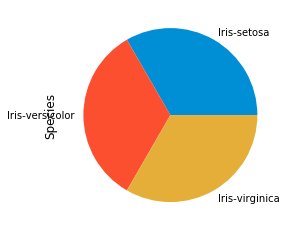

In [7]:
df['Species'].value_counts().plot.pie()

Box plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f22e4b7b8>,
      dtype=object)

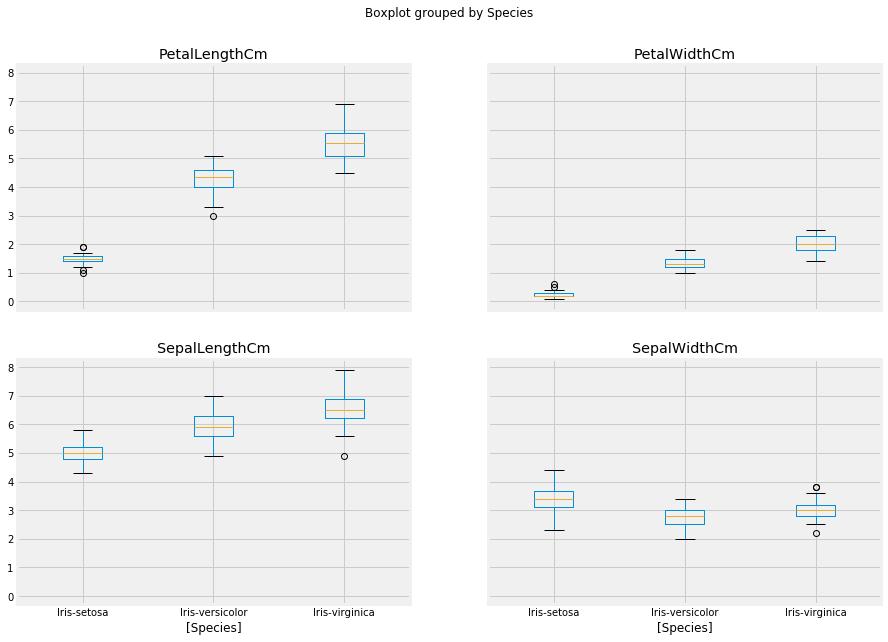

In [8]:
df.boxplot(by='Species', figsize=(15,10))

Heat map

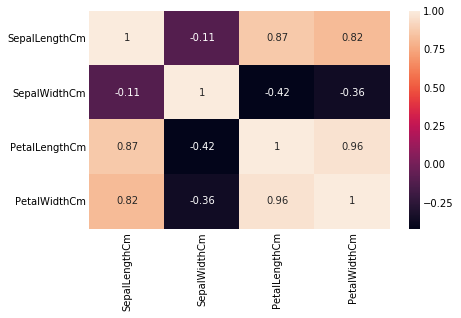

In [9]:
sns.heatmap(df.corr(),annot=True)

Pair plot

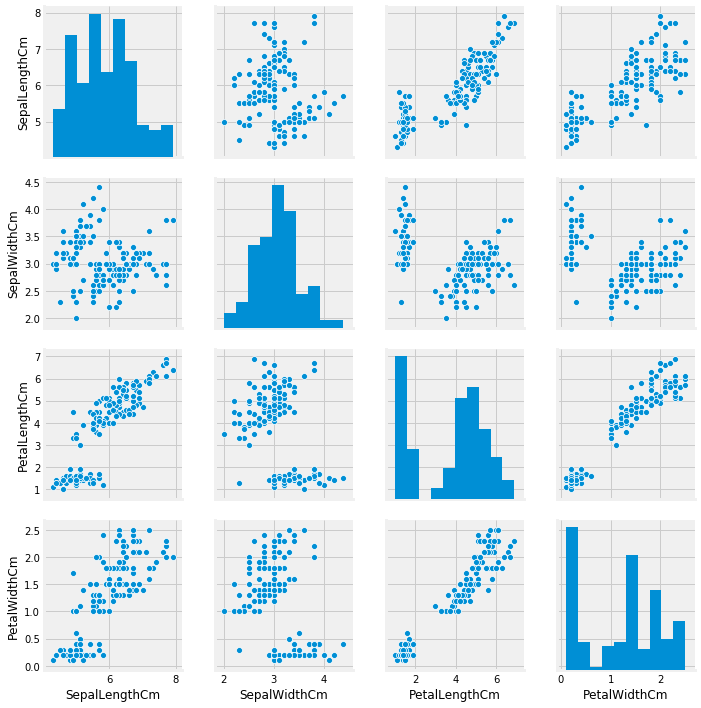

In [10]:
sns.pairplot(df)

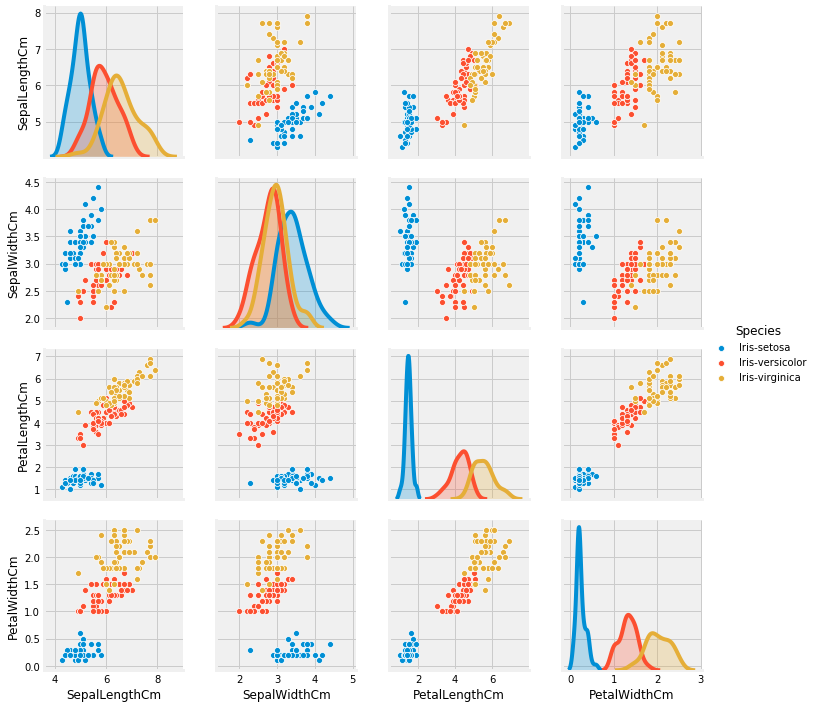

In [11]:
sns.pairplot(df, hue='Species')

PetalLengthCm, PetalWidthCm and SepalLengthCm are correlated.

## Classify

Choose only PetalWidthCm an PetalLengthCm as features.

In [12]:
# Encode labels
y = LabelEncoder().fit_transform(df['Species'])

# Read features
x = df.iloc[:, [2,3]].to_numpy()

# Split training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Report training and test set
def report(arr, name):
    unique, counts = np.unique(arr, return_counts=True)
    print(name)
    print(np.asarray((unique, counts)).T)
report(y_train, 'Training set')
report(y_test, 'Test set')

Training set
[[ 0 45]
 [ 1 39]
 [ 2 36]]
Test set
[[ 0  5]
 [ 1 11]
 [ 2 14]]


### [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

![Logistic Regression](https://miro.medium.com/max/1200/0*gKOV65tvGfY8SMem.png "Logistic Regression")

In [13]:
# Create and train model
lr = LogisticRegression().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.89      0.73      0.80        11
           2       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.87      0.87      0.86        30



### [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Introduction)

![Naive Bayes](https://thatware.co/wp-content/uploads/2019/03/naive-bayes.png "Naive Bayes")

In [14]:
# Create and train Gaussian Classifier
nb = GaussianNB().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, nb.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### [K-Nearest Neighbor](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)

![KNN](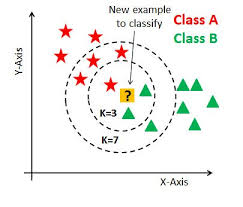 "KNN")

In [15]:
# Create and train kNN model
knn = KNeighborsClassifier().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### [Support Vector Machine](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)

![SVM](https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png "SVM")

In [16]:
# Create and train model
svm = SVC().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### [Decision Tree](https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.85      1.00      0.92        11
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.95      0.95      0.95        30
weighted avg       0.94      0.93      0.93        30



[Text(469.8, 489.24, 'X[0] <= 2.45\nentropy = 0.664\nsamples = 120\nvalue = [45, 39, 36]'),
 Text(384.3818181818182, 380.52000000000004, 'entropy = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(555.2181818181818, 380.52000000000004, 'X[1] <= 1.75\nentropy = 0.499\nsamples = 75\nvalue = [0, 39, 36]'),
 Text(341.6727272727273, 271.8, 'X[0] <= 4.95\nentropy = 0.172\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(170.83636363636364, 163.08000000000004, 'X[1] <= 1.65\nentropy = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(85.41818181818182, 54.360000000000014, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(256.25454545454545, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(512.5090909090909, 163.08000000000004, 'X[1] <= 1.55\nentropy = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(427.0909090909091, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(597.9272727272728, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0,

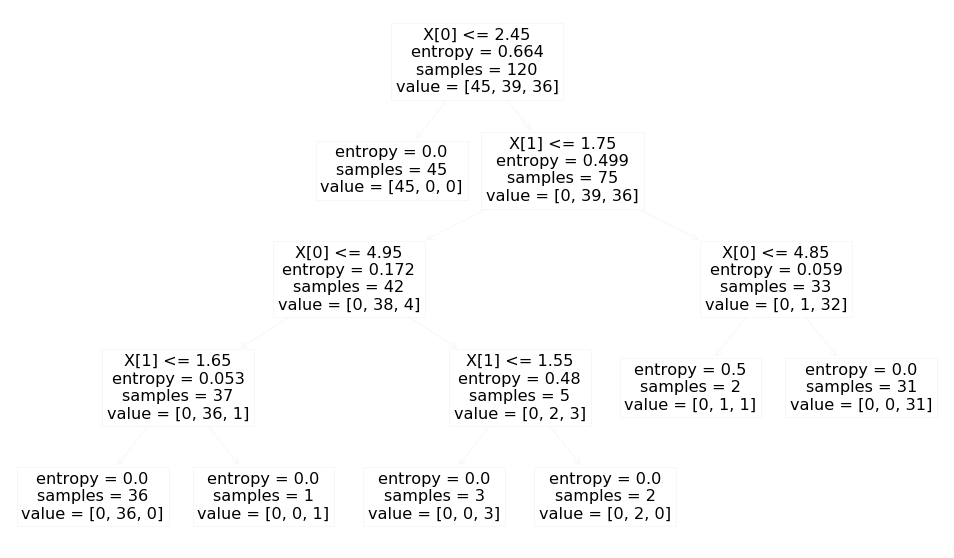

In [17]:
# Create and train model
dt = DecisionTreeClassifier().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, dt.predict(x_test)))

# Plot tree
plt.figure(figsize=(15, 10))
plot_tree(dt)

### [Boosted Tree](https://en.wikipedia.org/wiki/Gradient_boosting "Boosted Tree")

In [18]:
# Create and train model
bt = GradientBoostingClassifier().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, bt.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



### [Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(469.8, 489.24, 'X[0] <= 2.45\nentropy = 0.664\nsamples = 120\nvalue = [45, 39, 36]'),
 Text(384.3818181818182, 380.52000000000004, 'entropy = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(555.2181818181818, 380.52000000000004, 'X[1] <= 1.75\nentropy = 0.499\nsamples = 75\nvalue = [0, 39, 36]'),
 Text(341.6727272727273, 271.8, 'X[0] <= 4.95\nentropy = 0.172\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(170.83636363636364, 163.08000000000004, 'X[1] <= 1.65\nentropy = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(85.41818181818182, 54.360000000000014, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(256.25454545454545, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(512.5090909090909, 163.08000000000004, 'X[1] <= 1.55\nentropy = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(427.0909090909091, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(597.9272727272728, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0,

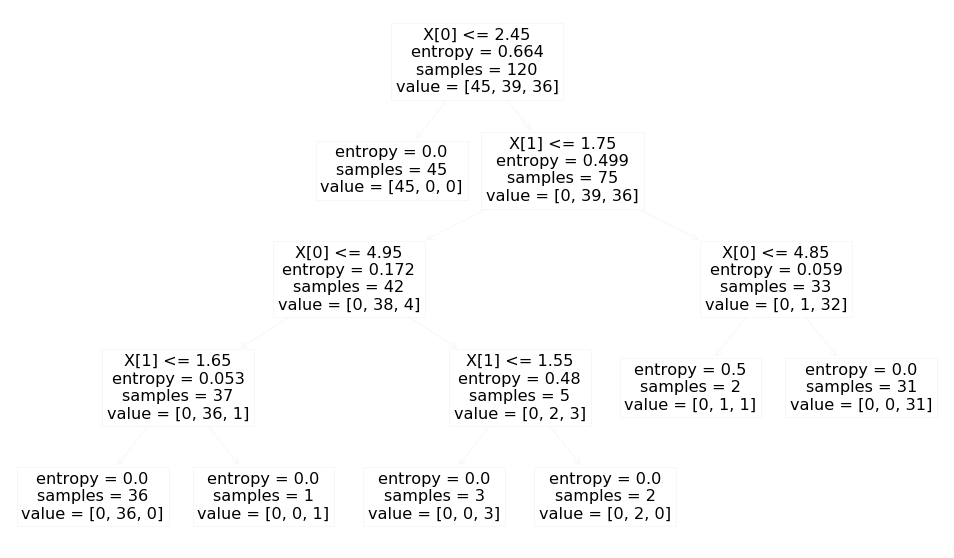

In [19]:
# Create and train model
rf = RandomForestClassifier().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, rf.predict(x_test)))

# Plot tree
plt.figure(figsize=(15, 10))
plot_tree(dt)

### [Neural Network](https://machinelearningmastery.com/when-to-use-mlp-cnn-and-rnn-neural-networks/)

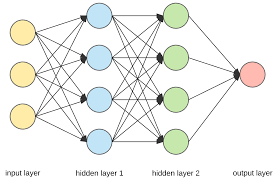

#### [Multilayer Perceptron (MLP)](https://machinelearningmastery.com/neural-networks-crash-course/)

In [20]:
# Standardize features (MLP sensitive) 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

# Create and train model
mlp = MLPClassifier().fit(x_train, y_train)

# Evaluate model
print(classification_report(y_test, mlp.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
## Grid Search to optimize hyperparameter

parameters = {'alpha': 10.0 ** -np.arange(1, 7)}

# Fit the model
model = GridSearchCV(MLPClassifier(),
                     param_grid=parameters)

model.fit(x_train,y_train)

print('Best Score:\t', model.best_score_)
print('Best Params:\t', model.best_params_)

Best Score:	 0.95
Best Params:	 {'alpha': 0.001}
